In [36]:
"""
You need to run this cell for the code in following cells to work.
"""

# Enable module reloading
%load_ext autoreload
%autoreload 2

%load_ext tensorboard

import datetime
import os
import sys
sys.path.append('..')

import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from matplotlib import pyplot


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [49]:
testx = np.genfromtxt('./datasets/dataSet1TestX.csv', delimiter=',')[1:]
testy = np.genfromtxt('./datasets/dataSet1TestY.csv', delimiter=',')

trainx = np.genfromtxt('./datasets/dataSet1TrainX.csv', delimiter=',')[1:]
trainy = np.genfromtxt('./datasets/dataSet1TrainY.csv', delimiter=',')

In [38]:
trainx[4]

array([ 2.        ,  3.        ,  0.        ,  2.        ,  4.        ,
        0.        ,  5.        ,  4.        ,  0.        ,  4.        ,
        3.        ,  0.        ,  3.        ,  4.        ,  0.        ,
       26.        ,  2.41176471,  2.70588235,  3.        ,  2.77647059,
        2.42352941])

In [8]:
testy

array([7., 5., 7., ..., 3., 6., 5.])

In [31]:
trainx.shape

(8265, 19)

In [24]:
trainy.shape

(8265,)

In [66]:
model = tf.keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(keras.layers.Embedding(input_dim=64, output_dim=1))

# Add a LSTM layer with 128 internal units.
model.add(keras.layers.GRU(32))

model.add(keras.layers.Dense(16, activation='softmax'))
# model.add(keras.layers.Dense(32, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
# model.compile(loss='huber_loss', 
              optimizer=keras.optimizers.SGD(lr=0.00001),
              metrics=['accuracy'])

history = model.fit(trainx, trainy,
          validation_data=(testx, testy),
          shuffle=True,
          batch_size=100,
          epochs=30)

model.evaluate(testx,testy)

values = model.predict(testx[:10])

Train on 8265 samples, validate on 1269 samples
Epoch 1/30
8265/8265 [==============================] - 13s 2ms/sample - loss: 2.7702 - accuracy: 0.1426 - val_loss: 2.7695 - val_accuracy: 0.1355
Epoch 2/30
8265/8265 [==============================] - 1s 158us/sample - loss: 2.7699 - accuracy: 0.1811 - val_loss: 2.7693 - val_accuracy: 0.1576
Epoch 3/30
8265/8265 [==============================] - 1s 180us/sample - loss: 2.7697 - accuracy: 0.2132 - val_loss: 2.7691 - val_accuracy: 0.1742
Epoch 4/30
8265/8265 [==============================] - 1s 176us/sample - loss: 2.7695 - accuracy: 0.2328 - val_loss: 2.7689 - val_accuracy: 0.1978
Epoch 5/30
8265/8265 [==============================] - 2s 203us/sample - loss: 2.7693 - accuracy: 0.2404 - val_loss: 2.7687 - val_accuracy: 0.2112
Epoch 6/30
8265/8265 [==============================] - 3s 313us/sample - loss: 2.7690 - accuracy: 0.2475 - val_loss: 2.7685 - val_accuracy: 0.2128
Epoch 7/30
8265/8265 [==============================] - 2s 226us/

In [ ]:
values[:5]

In [55]:
testy[:5]

array([7., 5., 7., 5., 3.])

In [39]:
print(history.history['loss'])

[2.2443318430467296, 2.120533879713369, 2.120235447730718, 2.119998530193451, 2.119074585072863, 2.1166765267244627, 2.1179072624686555, 2.1167973264087276, 2.115801502125089, 2.1145174901411883, 2.114981665441071, 2.1154392430512603, 2.1143915604189245, 2.1136991255079987, 2.1134401703342407, 2.114426835406858, 2.1128386148740073, 2.112011131920096, 2.11222652745694, 2.11145498935771]


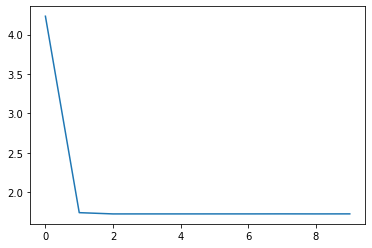

In [53]:
pyplot.plot(history.history['loss'])

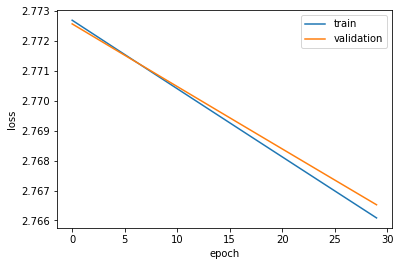

In [57]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [9]:
history.history.predict(testx[:3])

AttributeError: 'dict' object has no attribute 'predict'